# This is jupyter for demographics & $p$-factor comparison between ABCD and SNUH dataset

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [3]:
#Please change path where demographic&factor score files are located
file_path = "/users/hjd/IG_my_study/SNUH/code/Github_upload/files/"

## Gather demographic information from both dataset

In [4]:
#Demographic data of ABCD subjects used in previous research
abcd_demo_path = file_path + "/SGNNTL_ABCD_demographics.npz"

#Demographic data of local (SNUH) data
snuh_demo_path = file_path + "/SGNNTL_SNUH_demographics.npz"

In [5]:
abcd_demo = np.load(abcd_demo_path,allow_pickle=True)
snuh_demo = np.load(snuh_demo_path,allow_pickle=True)

In [6]:
abcd_df = pd.DataFrame(index = abcd_demo['subjectkey'],columns=['age','sex','race','data'])
abcd_df['age'] = abcd_demo['age']
abcd_df['sex'] = abcd_demo['sex']
abcd_df['race'] = abcd_demo['race']
abcd_df['data'] = "ABCD"

In [7]:
snuh_sbj = [i[0]+str(int(i[1:])) for i in snuh_demo['subjectkey']]
snuh_df = pd.DataFrame(index = snuh_sbj,columns=['age','sex','race','data'])
snuh_df['age'] = snuh_demo['age']
snuh_df['sex'] = snuh_demo['sex']
#All SNUH subjects are Korean, but inlcuded in Asian for comparison with ABCD data
snuh_df['race'] = "Asian"
snuh_df['data'] = "SNUH"

In [8]:
total_df = pd.concat([abcd_df,snuh_df])

## Compare demographics

<AxesSubplot:xlabel='age', ylabel='Density'>

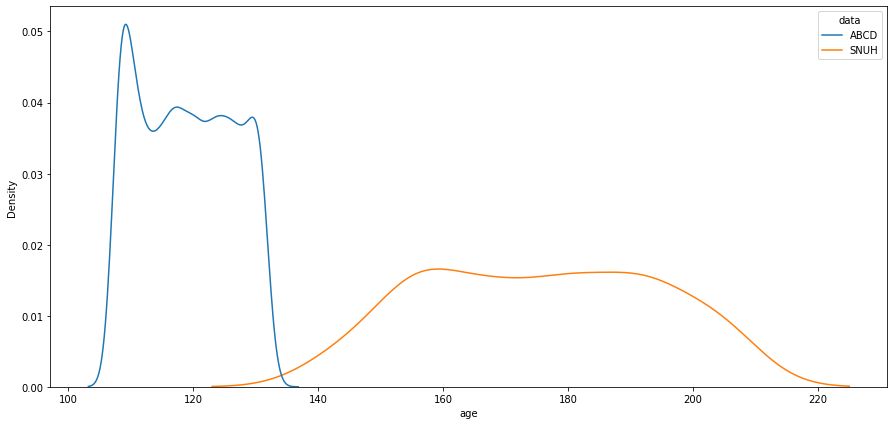

In [9]:
plt.figure(figsize=(15,7))
sns.kdeplot(x='age',data=total_df,common_norm=False,
            hue='data',
            hue_order = ["ABCD","SNUH"])

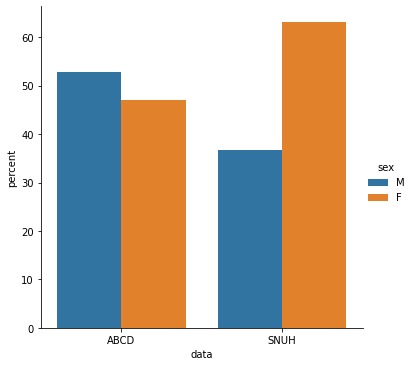

In [10]:
#Sex distribution of two datasets
total_df.groupby('data')['sex'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='data',y='percent',hue='sex',kind='bar')

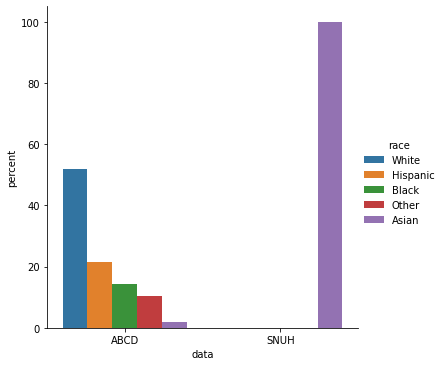

In [11]:
#Race(Ethnicity) distribution of two datasets
total_df.groupby('data')['race'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x='data',y='percent',hue='race',kind='bar')

## $p$-factor comparison

In [12]:
p_df = pd.read_csv("/data4/SNU/data/ABCD_SNUH_CFA_p.csv",sep='\t',index_col=0)

In [13]:
abcd_p = p_df.loc[abcd_demo['subjectkey'],['p']]
abcd_p['data1']="ABCD"
abcd_p['data2']="ABCD"
print(len(abcd_p))

snuh_p = p_df.loc[snuh_sbj,['p']]
snuh_p['data1'] = "SNUH_Total"
for i in snuh_p.index:
    if 'C' in i:
        snuh_p.loc[i,'data2'] = "SNUH_HC"
    if 'P' in i:
        snuh_p.loc[i,'data2'] = "SNUH_MDD"
print(len(snuh_p))
p_df = pd.concat([abcd_p,snuh_p],axis=0)

6905
125


In [14]:
p_df

,p,data1,data2
subjectkey,,,
NDAR_INV003RTV85,-0.403,ABCD,ABCD
NDAR_INV00BD7VDC,0.264,ABCD,ABCD
NDAR_INV00LH735Y,-0.183,ABCD,ABCD
NDAR_INV00LJVZK2,0.788,ABCD,ABCD
NDAR_INV00R4TXET,0.073,ABCD,ABCD
...,...,...,...
P88,0.664,SNUH_Total,SNUH_MDD
P90,0.082,SNUH_Total,SNUH_MDD
P91,0.214,SNUH_Total,SNUH_MDD


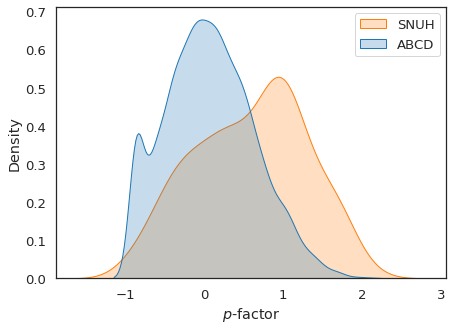

In [15]:
sns.set(style='white',font_scale=1.2)
plt.figure(figsize=(7,5))
sns.kdeplot(x='p',hue='data1',data=p_df,common_norm=False,fill=True,
           hue_order = ['ABCD','SNUH_Total'],
           palette=sns.color_palette("tab10")[:2])
plt.xlabel("$p$-factor")
plt.legend(["SNUH","ABCD"])

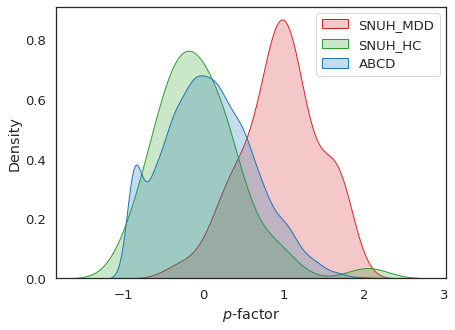

In [16]:
sns.set(style='white',font_scale=1.2)
plt.figure(figsize=(7,5))
sns.kdeplot(x='p',hue='data2',data=p_df,common_norm=False,fill=True,
           hue_order = ['ABCD','SNUH_HC','SNUH_MDD'],
           palette=[sns.color_palette("tab10")[0],sns.color_palette("tab10")[2],sns.color_palette("tab10")[3]])
plt.xlabel("$p$-factor")
plt.legend(["SNUH_MDD","SNUH_HC","ABCD"])

## Other factor scores

In [35]:
fs_df = pd.read_csv("/data4/SNU/data/ABCD_SNUH_CFA_p.csv",sep='\t',index_col=0)

abcd_fs = fs_df.loc[abcd_demo['subjectkey'],:]
abcd_fs['data1']="ABCD"
abcd_fs['data2']="ABCD"
print(len(abcd_fs))

snuh_fs = fs_df.loc[snuh_sbj,:]
snuh_fs['data1'] = "SNUH_Total"
for i in snuh_fs.index:
    if 'C' in i:
        snuh_fs.loc[i,'data2'] = "SNUH_HC"
    if 'P' in i:
        snuh_fs.loc[i,'data2'] = "SNUH_MDD"
print(len(snuh_fs))
fs_df = pd.concat([abcd_fs,snuh_fs],axis=0)

fs_df.reset_index(inplace=True)
fs_df_melt1 = fs_df.melt(id_vars=['subjectkey','data1'],value_vars=['p','ext','int','neu','som','det'])
fs_df_melt2 = fs_df.melt(id_vars=['subjectkey','data2'],value_vars=['p','ext','int','neu','som','det'])

6905
125


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

int_ABCD v.s. int_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.631e-20 U_stat=2.197e+05
neu_ABCD v.s. neu_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.280e-10 U_stat=2.857e+05
som_ABCD v.s. som_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.646e-08 U_stat=3.045e+05
det_ABCD v.s. det_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.728e-22 U_stat=2.104e+05
p_ABCD v.s. p_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.725e-16 U_stat=2.455e+05
ext_ABCD v.s. ext_SNUH_Total: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.652e-12 U_stat=2.724e+05


(-1.5, 3.5)

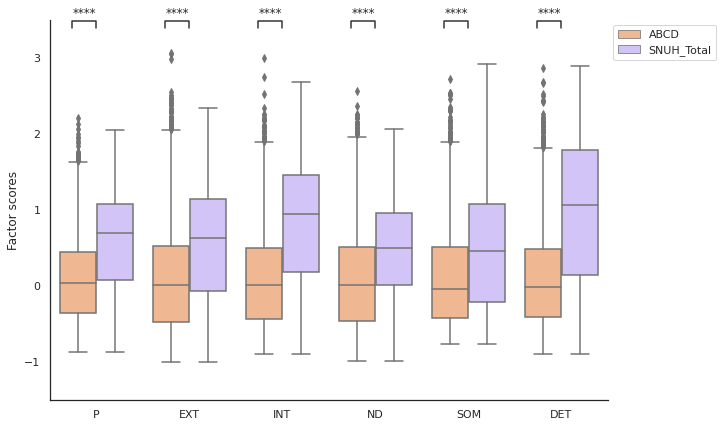

In [38]:
sns.set(style='white',font_scale=1)
plt.figure(figsize=(10,7))
fig = sns.boxplot(x='variable',y='value',hue='data1',data=fs_df_melt1,
                  palette= [sns.color_palette("pastel")[1],sns.color_palette("pastel")[4]],
            order=['p','ext','int','neu','som','det'],
            hue_order = ['ABCD','SNUH_Total']
                 )

fig, test_results = add_stat_annotation(
    fig,
    data=fs_df_melt1,
    x='variable',
    y='value',
    hue = 'data1',
    hue_order = ['ABCD','SNUH_Total','SNUH_Total_MDD'],
    order=['p','ext','int','neu','som','det'],
    box_pairs=[(("p", "ABCD"),("p", "SNUH_Total")),
               (("ext", "ABCD"),("ext", "SNUH_Total")),
               (("int", "ABCD"),("int", "SNUH_Total")),
               (("neu", "ABCD"),("neu", "SNUH_Total")),
               (("som", "ABCD"),("som", "SNUH_Total")),
               (("det", "ABCD"),("det", "SNUH_Total")),
              ],
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    verbose=2,
)

plt.xticks(ticks=fig.get_xticks(),labels=['P','EXT','INT','ND','SOM','DET'])

fig.spines["right"].set_visible(False)
fig.spines["top"].set_visible(False)
plt.xlabel(" ")
plt.ylabel("Factor scores")
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
plt.ylim(-1.5,3.5)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

int_ABCD v.s. int_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.737e+05
neu_ABCD v.s. neu_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.911e-01 U_stat=1.846e+05
som_ABCD v.s. som_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.250e-01 U_stat=1.873e+05
det_ABCD v.s. det_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.653e+05
p_ABCD v.s. p_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.817e+05
ext_ABCD v.s. ext_SNUH_HC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.755e+05
int_ABCD v.s. int_SNUH_MDD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correctio

(-1.5, 3.5)

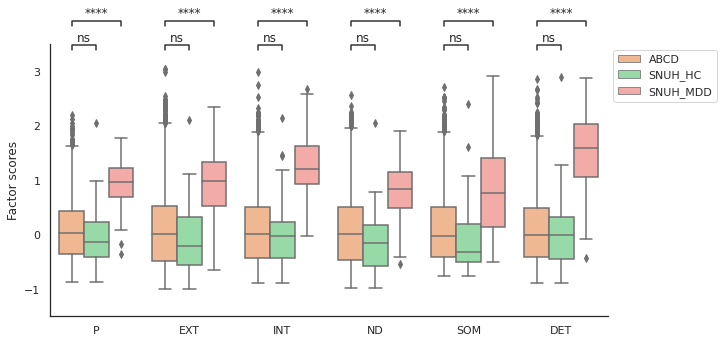

In [36]:
sns.set(style='white',font_scale=1)
plt.figure(figsize=(10,5))
fig = sns.boxplot(x='variable',y='value',hue='data2',data=fs_df_melt2,
                  palette= sns.color_palette("pastel")[1:],
            order=['p','ext','int','neu','som','det'],
            hue_order = ['ABCD','SNUH_HC','SNUH_MDD'] #'SNUH']
                 )

fig, test_results = add_stat_annotation(
    fig,
    data=fs_df_melt2,
    x='variable',
    y='value',
    hue = 'data2',
    hue_order = ['ABCD','SNUH_HC','SNUH_MDD'],
    order=['p','ext','int','neu','som','det'],
    box_pairs=[(("p", "ABCD"),("p", "SNUH_HC")),(("p", "ABCD"),("p", "SNUH_MDD")),
               (("ext", "ABCD"),("ext", "SNUH_HC")),(("ext", "ABCD"),("ext", "SNUH_MDD")),
               (("int", "ABCD"),("int", "SNUH_HC")),(("int", "ABCD"),("int", "SNUH_MDD")),
               (("neu", "ABCD"),("neu", "SNUH_HC")),(("neu", "ABCD"),("neu", "SNUH_MDD")),
               (("som", "ABCD"),("som", "SNUH_HC")),(("som", "ABCD"),("som", "SNUH_MDD")),
               (("det", "ABCD"),("det", "SNUH_HC")),(("det", "ABCD"),("det", "SNUH_MDD"))
              ],
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    verbose=2,
)

plt.xticks(ticks=fig.get_xticks(),labels=['P','EXT','INT','ND','SOM','DET'])

fig.spines["right"].set_visible(False)
fig.spines["top"].set_visible(False)
plt.xlabel(" ")
plt.ylabel("Factor scores")
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
plt.ylim(-1.5,3.5)